# <u><i> House Price
## Predict the House Price

Predicting the house Price of the based on various factors: 
1) Location<br>
2) BHK<br>
3) Furnishing<br>
4) Sq.ft<br>
5) Old(in yrs)<br>
6) Floor

## LOADING DATASET

In [6]:
import warnings
warnings.filterwarnings('ignore')  #Eliminating the Warnings message while program in execution.
import pandas as pd

df = pd.read_csv(r'D:\Internship\project\Copy of house_price.csv')
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3.0,1.0,3000.0,1,3,28000
1,Bommanahalli,3.0,1.0,1650.0,10,0,18000
2,Whitefield,2.0,0.0,1000.0,5,3,16400
3,Whitefield,3.0,0.0,1600.0,1,9,27000
4,Whitefield,2.0,1.0,1200.0,5,1,20000


In [7]:
df.shape # No. of rows and columns in dataset.

(1001, 7)

## UPDATING VALUES AND REMOVING OUTLIERS

### 1) REMOVING NULL VALUES

In [8]:
df.isna().sum()

Location      1
BHK           1
Furnishing    1
Sq.ft         1
Old(years)    1
Floor         1
Price         1
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

### 2) TRANSFORMING VARIABLES FROM OBJECT TYPE TO NUMERIC TYPE

In [10]:
df.dtypes

Location       object
BHK           float64
Furnishing    float64
Sq.ft         float64
Old(years)     object
Floor          object
Price          object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

ls = LabelEncoder()
df['Location'] = ls.fit_transform(df['Location'])
df['Old(years)'] = df['Old(years)'].astype(float)
df['Floor'] = df['Floor'].astype(float)
df['Price'] = df['Price'].astype(float)

In [12]:
df.dtypes

Location        int32
BHK           float64
Furnishing    float64
Sq.ft         float64
Old(years)    float64
Floor         float64
Price         float64
dtype: object

In [13]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3.0,1.0,3000.0,1.0,3.0,28000.0
1,0,3.0,1.0,1650.0,10.0,0.0,18000.0
2,1,2.0,0.0,1000.0,5.0,3.0,16400.0
3,1,3.0,0.0,1600.0,1.0,9.0,27000.0
4,1,2.0,1.0,1200.0,5.0,1.0,20000.0


## 3) Checking for outliers for the input features using Boxplot and Pairplot.

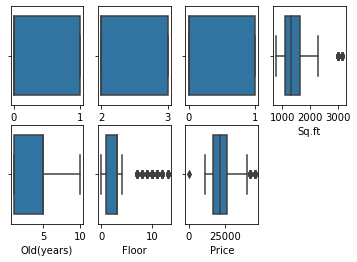

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

i = 1
for x in df.columns:
    plt.subplot(2,4,i)
    sns.boxplot(df[x])
    i+=1
    
plt.show()

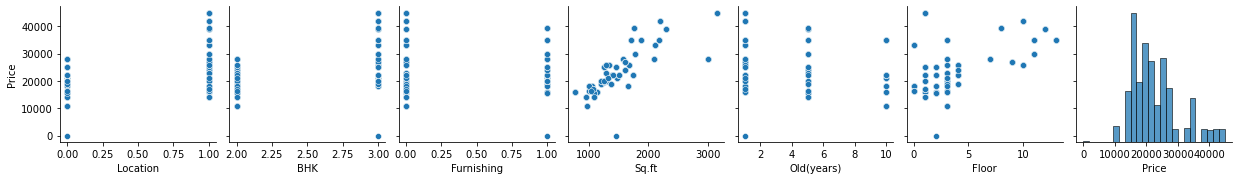

In [15]:
sns.pairplot(df,y_vars=['Price'])

## SPLITTING DATASET INTO TRAINING DATA AND TESTING DATA

In [16]:
from sklearn.model_selection import train_test_split

x = df.drop("Price", axis=1)
y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

## EVALUATION OF MODEL
### 1) CALCULATING MODEL SCORE

In [17]:
def mscore(m):
    print("Training Score: ", m.score(x_train,y_train))
    print("Testing Score: ", m.score(x_test,y_test))

### 2) PREDICTING PRICE BY TEST MODEL

In [18]:
def predict_val(m,x_test):
    return m.predict(x_test)

### 3) CALCULATING ACCURACY OF THE MODEL

In [19]:
from sklearn.metrics import accuracy_score

def cal_acc(y_test,y_pred):
    print("\nAccuracy of the Model: ",accuracy_score(y_test,y_pred))

## CREATING MODELS

## 1) Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

m1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=15, max_depth=9, min_samples_leaf=11)
m1.fit(x_train,y_train)
mscore(m1)  # 1. Calculating model score
y_pred = predict_val(m1,x_test)
cal_acc(y_test,y_pred)

Training Score:  0.9372496662216289
Testing Score:  0.892

Accuracy of the Model:  0.892


## 2) Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

m2 = LogisticRegression(max_iter=100000)
m2.fit(x_train,y_train)
mscore(m2)
y_predict = predict_val(m2,x_test)
cal_acc(y_test,y_pred)

Training Score:  0.8184245660881175
Testing Score:  0.812

Accuracy of the Model:  0.892


In [16]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3.0,1.0,3000.0,1.0,3.0,28000.0
1,0,3.0,1.0,1650.0,10.0,0.0,18000.0
2,1,2.0,0.0,1000.0,5.0,3.0,16400.0
3,1,3.0,0.0,1600.0,1.0,9.0,27000.0
4,1,2.0,1.0,1200.0,5.0,1.0,20000.0


# Predicting the values based on user input.

In [ ]:
loc = int(input('\n\tHouse Price Prediction\n  Location: (0) Bommanahalli   (1) Whitefield\nEnter Choice: '))
bhk = float(input('\nEnter bhk: '))
fur = float(input('Furnishing: (0) No   (1) Yes\nEnter Choice: '))
sqft = float(input('Sq.ft: '))
old = float(input('Old(years): '))
floor = float(input('Floor: '))

data = {'Location':[loc],'BHK':[bhk],'Furnishing':[fur],'Sq.ft':[sqft],'Old(years)':[old],'Floor':[floor]}
l=pd.DataFrame(data)
print('\nOutput Based on Decision Tree Model Price= :',end='')
k = predict_val(m1,l)
print(k)
print('\nOutput Based on Logistic Regression Model Price= :',end='')
k = predict_val(m2,l)
print(k)

## Conclusion

Based on model we train we get our outputs. We might see some variation in output produced in the two models we have trained.<br> This arises due to difference we observe in the model score.